# Principle Component Analysis (PCA) for Data Visualization with Iris Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Load Iris Dataset 

In [2]:
df_iris = pd.read_csv('IRIS.csv')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#CHECK KIND OF SPECIES

df_iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Label encoding

In [4]:
#FROM SK.PREPROCESSING IMPORT LABELENCODER

#encode the species
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#species = [0, 1, 2], encode from names into numbers
le = LabelEncoder()
le.fit(species)
df_iris['species'] = le.fit_transform(df_iris['species'].astype(str))

df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Split columns

In [5]:
#FEATURES

iris_X = df_iris.drop('species', axis = 1)
iris_X
#drop the last column aka num column into a single column

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
#label, target, groundtruth

iris_y = df_iris['species'] #column y is the last column in dataset with the name num
iris_y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

## Split data

In [7]:
#Split data into train set (80%), test set (20%)
#optional

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size = 0.2, random_state = 0) #init parameters
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Standardize the Data

In [8]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std

array([[ 0.61303014,  0.10850105,  0.94751783,  0.73603967],
       [-0.56776627, -0.12400121,  0.38491447,  0.34808318],
       [-0.80392556,  1.03851009, -1.30289562, -1.3330616 ],
       [ 0.25879121, -0.12400121,  0.60995581,  0.73603967],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25331499],
       [-0.80392556, -0.82150798,  0.04735245,  0.21876435],
       [-0.21352735,  1.73601687, -1.19037495, -1.20374277],
       [ 0.14071157, -0.82150798,  0.72247648,  0.47740201],
       [ 0.02263193, -0.12400121,  0.21613346,  0.34808318],
       [-0.09544771, -1.05401024,  0.10361279, -0.03987331],
       [ 1.0853487 , -0.12400121,  0.94751783,  1.12399616],
       [-1.39432376,  0.34100331, -1.41541629, -1.3330616 ],
       [ 1.20342834,  0.10850105,  0.72247648,  1.38263382],
       [-1.04008484,  1.03851009, -1.24663528, -0.81578628],
       [-0.56776627,  1.50351461, -1.30289562, -1.3330616 ],
       [-1.04008484, -2.4490238 , -0.1776889 , -0.29851096],
       [ 0.73110978, -0.

In [9]:
def plot_decision_regions(X, y, classifier, resolution=0.1):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.6,
            c=cmap(idx),
            edgecolor='black',
            marker=markers[idx],
            label=cl)

## Visualize 2D Projection with Logistic Regression

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


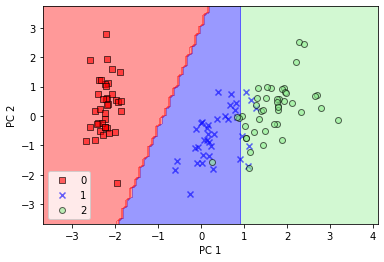

In [10]:
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


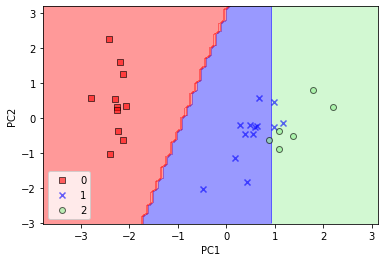

In [11]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

## Explained Variance Ratio

In [12]:
pca.explained_variance_ratio_

array([0.72226528, 0.23974795])

## Logistic Regression

In [13]:
model_lr = LogisticRegression(max_iter = 100, random_state = 0)
model_lr = model_lr.fit(X_train_pca, y_train)

In [14]:
y_test_pred = model_lr.predict(X_test_pca)

In [15]:
np.array(y_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [16]:
print('Test accuracy 1: ', model_lr.score(X_test_pca, y_test))
print('Test accuracy 2: ', accuracy_score(y_test, y_test_pred))

Test accuracy 1:  0.8666666666666667
Test accuracy 2:  0.8666666666666667


Confusion_matrix using Logistic Regression is  : 


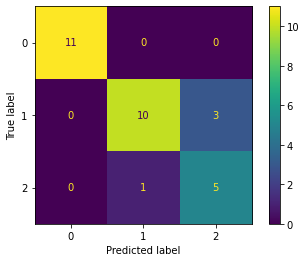

Classification_report using Logistic Regression is  : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.77      0.83        13
           2       0.62      0.83      0.71         6

    accuracy                           0.87        30
   macro avg       0.84      0.87      0.85        30
weighted avg       0.89      0.87      0.87        30



In [17]:
#CONFUSION MATRIX LOGISTIC REGRESSION

print("Confusion_matrix using Logistic Regression is  : ")
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lr.classes_)
disp.plot()
plt.show()
print("Classification_report using Logistic Regression is  : ")
print(classification_report(y_test, y_test_pred))

## SVM

In [18]:
# p = []

# for i in range(1, 100):
#     model_svm = SVC(C = i, kernel = 'rbf', gamma = 'auto', max_iter = 1000)
#     model_svm = model_svm.fit(X_train_pca, y_train)
#     y_test_pred_svm = model_svm.predict(X_test_pca)
#     p.append(accuracy_score(y_test, y_test_pred_svm))

# plt.plot(range(1, 100), p)
model_svm = SVC(gamma='auto', kernel='linear', max_iter = 1000) #C = ???
#model_svm = SVC(C=10, gamma='auto', kernel='poly', max_iter = 1000)
#model_svm = SVC(C=10, gamma='auto', kernel='rbf', max_iter = 1000) #gaussian 
model_svm

SVC(gamma='auto', kernel='linear', max_iter=1000)

In [19]:
model_svm = model_svm.fit(X_train_pca, y_train)

In [20]:
y_test_pred_svm = model_svm.predict(X_test_pca)
y_test_pred_svm

array([2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [21]:
np.array(y_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [22]:
print("Test accuracy 1: ", model_svm.score(X_test_pca, y_test))
print("Test accuracy 2: ", accuracy_score(y_test, y_test_pred_svm))

Test accuracy 1:  0.9333333333333333
Test accuracy 2:  0.9333333333333333


In [23]:
cp = classification_report(y_test, y_test_pred_svm, output_dict=True)
cp

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11},
 '1': {'precision': 1.0,
  'recall': 0.8461538461538461,
  'f1-score': 0.9166666666666666,
  'support': 13},
 '2': {'precision': 0.75,
  'recall': 1.0,
  'f1-score': 0.8571428571428571,
  'support': 6},
 'accuracy': 0.9333333333333333,
 'macro avg': {'precision': 0.9166666666666666,
  'recall': 0.9487179487179488,
  'f1-score': 0.9246031746031745,
  'support': 30},
 'weighted avg': {'precision': 0.95,
  'recall': 0.9333333333333333,
  'f1-score': 0.9353174603174602,
  'support': 30}}

Confusion_matrix using SVM is  : 


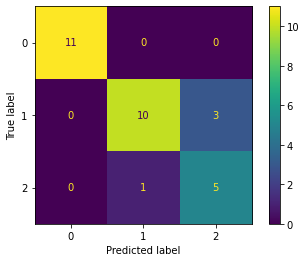

Classification_report using SVM is  : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.77      0.83        13
           2       0.62      0.83      0.71         6

    accuracy                           0.87        30
   macro avg       0.84      0.87      0.85        30
weighted avg       0.89      0.87      0.87        30



In [24]:
#CONFUSION MATRIX SVM

print("Confusion_matrix using SVM is  : ")
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svm.classes_)
disp.plot()
plt.show()
print("Classification_report using SVM is  : ")
print(classification_report(y_test, y_test_pred))